# Buffalo Tree Analysis

In [ ]:
import pandas as pd
from IPython.display import display
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)
rcParams['figure.figsize'] = 6,6
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

In [ ]:
# Importing csv and renaming columns 

rename_cols = ['Total_Yearly_Eco_Benefits','Stormwater_Benefits','Stormwater_Gallons','Greenhouse_CO2_Benefits','CO2_Avoided','CO2_Sequestered','Energy_Benefits','kWh_Saved','Therms_Saved','Air_Quality_Benefits','Pollutants_Saved','Property_Benefits','Leaf_Surface_Area']
current_name = ['Total Yearly Eco Benefits ($)','Stormwater Benefits ($)','Stormwater Gallons Saved','Greenhouse CO2 Benefits ($)','CO2 Avoided (in lbs.)','CO2 Sequestered (in lbs.)','Energy Benefits ($)','kWh Saved','Therms Saved','Air Quality Benefits ($)','Pollutants Saved (in lbs.)','Property Benefits ($)','Leaf Surface Area (in sq. ft.)']

tree_df = pd.read_csv('Tree_Inventory.csv')
tree_df.rename(columns={current_name[0]:rename_cols[0],current_name[1]:rename_cols[1],current_name[2]:rename_cols[2],current_name[3]:rename_cols[3],current_name[4]:rename_cols[4],current_name[5]:rename_cols[5],current_name[6]:rename_cols[6],current_name[7]:rename_cols[7],current_name[8]:rename_cols[8],current_name[9]:rename_cols[9],current_name[10]:rename_cols[10],current_name[11]:rename_cols[11],current_name[12]:rename_cols[12],'Site ID':'Site_ID','Police Districts':'Police_Districts','Council Districts':'District_id','Council District':'Council_District','Zip Codes':'Zip_Codes',"Botanical Name":"Botanical_Name","Common Name":"Common_Name","Park Name":"Park_Name"},inplace=True)
tree_df = tree_df.dropna(axis=0)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data 

Data is available at Tree_Inventory.csv

Data Description - https://data.buffalony.gov/Quality-of-Life/Tree-Inventory/n4ni-uuec


# Problem statements

- Identify the top trees to be planted on the vacant lot which will improve the quality of life 

- Identify the factors that impact yearly ecological benefits and provide suggestions to increase the ecological benefits 


# Dataset 

### Source: 
- Open Data Buffalo 
- Open data program aims to make public information available free for everyone

### Data - Tree Inventory
- All street trees within the City of Buffalo. 
- The City of Buffalo Bureau of Forestry is responsible for maintaining and preserving the public urban forest

## Dataset - Gist 


In [ ]:
display(tree_df.head())

,Editing,Botanical_Name,Common_Name,DBH,Total_Yearly_Eco_Benefits,Stormwater_Benefits,Stormwater_Gallons,Greenhouse_CO2_Benefits,CO2_Avoided,CO2_Sequestered,Energy_Benefits,kWh_Saved,Therms_Saved,Air_Quality_Benefits,Pollutants_Saved,Property_Benefits,Leaf_Surface_Area,Address,Street,Side,Site,Council_District,Park_Name,Latitude,Longitude,Site_ID,Location
0,Buffalo,AILANTHUS ALTISSIMA,AILANTHUS,35,282.19,37.44,4679.79,2.65,432.71,481.06,113.05,175.57,62.82,18.96,2.99,110.10,182.98,494,KENSINGTON AV,Front,1,MASTEN,0,42.930,-78.834,132500,"(42.9298755572745, -78.8338696116123)"
1,Buffalo,ACER CAMPESTRE,"MAPLE, HEDGE",15,134.79,9.13,1140.93,1.30,238.12,225.40,60.16,96.61,33.11,8.96,1.49,55.25,91.83,149,PETER ST,Front,1,NORTH,0,42.941,-78.889,53359,"(42.9414919801919, -78.8890548127135)"
2,Buffalo,SYRINGA RETICULATA 'IVORY SILK',"LILAC, IVORY SILK",4,24.42,1.19,148.59,0.18,32.67,25.27,11.29,13.25,6.70,1.41,0.23,10.36,17.22,78,GREELEY ST,Side,1,NORTH,0,42.950,-78.883,46812,"(42.9498795777274, -78.8827039922936)"
3,Buffalo,VACANT,VACANT,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,46,WOODLEY RD,Front,1,UNIVERSITY,0,42.945,-78.802,77544,"(42.9452730867877, -78.8022048046701)"
4,Buffalo,OSTRYA VIRGINIANA,"HOPHORNBEAM, AMERICAN",11,98.84,3.41,426.35,0.06,13.15,7.18,43.82,62.51,24.90,0.94,0.14,50.61,84.11,98,TURNER AV,Front,1,SOUTH,0,42.833,-78.802,114479,"(42.8328515651786, -78.8021269052032)"


# Project Workflow

- Construct a relational schema for Buffalo Tree Inventory dataset 

- Create DB and push data into the DB 

- Use sql queries to import Data

- Perform Exploratory Data Analysis

- Deploy predictive models - Multiple Linear Regression

## DB Schema
```
Editing Table
Editing_id Primary Key
Editing Text

Name Table
Name_id Primary Key
Botanical Name Text
Common Name Text

District Table
District_id primary key
Council District

Location Table
Site ID primary key
Editing_Id oreign key Editing Table
District_id foreign key District Table
name_id foreign key Name Table
Address
Street
Side
Latitude
Longitude
Park_Name

Benefits
Site_id primary key
Total Yearly Eco Benefits (usd)
Stormwater Benefits (usd)
Stormwater Gallons Saved
Greenhouse CO2 Benefits (usd)
CO2 Avoided (in lbs)
CO2 Sequestered (in lbs.)
Energy Benefits (usd)
kWh Saved
Therms Saved
Air Quality Benefits (usd)
Pollutants Saved (usd)
Property Benefits (usd)

Tree Dim Table
Site_id primary key
dbh (Diameter in inches)
Leaf Surface Area (in sq. ft.)
```

## Creating DB and Inserting into DB

In [ ]:
# Db Functions 

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

def create_table(conn, create_table_sql, drop_table_name=None):
    if drop_table_name:  # You can optionally pass drop_table_name to drop the table.
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)

    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

def execute_sql_statement(sql_statement, insert_data,conn):
    cur = conn.cursor()

    cur.execute
    
    emany(sql_statement,insert_data)

    rows = cur.fetchall()
    #return rows

def df_sql(df,table_name,conn):
    df.to_sql(table_name,con = conn,if_exists='append',index=False)



In [ ]:
# Sql Create Statements

create_edition_table = """CREATE TABLE Editing(
Editing_id integer NOT NULL PRIMARY KEY,
Editing text not null)"""

create_name_table = """CREATE TABLE Name(
Name_id Integer NOT NULL PRIMARY KEY,
Botanical_Name text not null,
Common_Name text not null);"""

create_district_table = """CREATE TABLE District(
District_id integer NOT NULL PRIMARY KEY,
Council_District text not null);"""

create_location_table = """CREATE TABLE Location(
Site_id integer NOT NULL PRIMARY KEY,
District_id integer NOT NULL,
name_id integer NOT NULL,
Editing_id integer NOT NULL,
Address text not null,
Street text not null,
Side text not null,
Longitude text not null,
Latitude text not null,
Park_Name text,
FOREIGN KEY(District_id) REFERENCES District(District_id),
FOREIGN KEY(name_id) REFERENCES Name(name_id),
FOREIGN KEY(Editing_id) REFERENCES Editing(Editing_id));"""

create_tree_dim_table = """CREATE TABLE Tree_Dim
    (Site_id integer NOT NULL PRIMARY KEY,
    dbh  float not null,
    Leaf_Surface_Area float not null);"""

create_benefits_table = """CREATE TABLE Benefits
    (Site_id integer NOT NULL PRIMARY KEY,
    Total_Yearly_Eco_Benefits  float not null,
    Stormwater_Benefits float not null,
    Stormwater_Gallons float not null,
    Greenhouse_CO2_Benefits float not null,
    CO2_Avoided float not null,
    CO2_Sequestered float not null,
    Energy_Benefits float not null,
    kWh_Saved float not null,
    Therms_Saved float not null,
    Air_Quality_Benefits float not null,
    Pollutants_Saved float not null,
    Property_Benefits float not null
    );"""

In [ ]:
# Connection 

conn = create_connection('buffalo_tree.db',True)

In [ ]:
# Other junk removing functions 

def cleanup(x):
    if type(x) == str:
        if x.startswith("*") == True:
            return '0'
        elif x.isdigit() == True:
            return '0'
        else:
            return x
    else:
        return x

def cleanup_ad(x):
    if x > 3500:
        return 0
    else:
        return x

# A Glimpse of DB Tables

## Editing Table 

In [ ]:
# Editing Table 

editing_tab = create_table(conn,create_edition_table,drop_table_name="Editing")
editing = tree_df[['Editing']]
editing = editing.drop_duplicates(subset = ['Editing'],inplace=False,ignore_index=True)
editing = editing.sort_values(by=['Editing'])
insert_editing = df_sql(editing,"Editing",conn)


In [ ]:
# Display Editing

editing_to_print = pd.read_sql_query("""SELECT * FROM Editing""",conn)
display(editing_to_print.head())

,Editing_id,Editing
0,1,Buffalo
1,2,Olmsted


## Names Table

In [ ]:
# Tree names table 

names_table = create_table(conn,create_name_table,'Name')
names = tree_df[['Botanical_Name','Common_Name']]
names_new = pd.DataFrame(names.applymap(cleanup))
names_new = names_new.drop_duplicates(subset = ['Botanical_Name','Common_Name'],inplace=False,ignore_index=True)
names_new = names_new.sort_values(by = ['Botanical_Name'])
insert_tree = df_sql(names_new,'Name',conn)

In [ ]:
# Display Tree Names table

name_to_print = pd.read_sql_query("""SELECT * FROM Name""",conn)
display(name_to_print.head())

,Name_id,Botanical_Name,Common_Name
0,1,0,0
1,2,ABIES BALSAMEA,"FIR, BALSAM"
2,3,ABIES CONCOLOR,"FIR, WHITE"
3,4,ACER CAMPESTRE,"MAPLE, HEDGE"
4,5,ACER CAPPADOCICUM,"MAPLE, COLISEUM"


## District Table 

In [ ]:
# District Table 

dist_table = create_table(conn,create_district_table,"District")
dist_final = tree_df[['Council_District']]
dist_final = dist_final.drop_duplicates(subset = ['Council_District'],inplace=False,ignore_index=True)
dist_final = dist_final.sort_values(by = ['Council_District'])
insert_dist = df_sql(dist_final,"District",conn)

In [ ]:
# Display District Table

dist_to_print = pd.read_sql_query("""SELECT * FROM District""",conn)
display(dist_to_print.head())

,District_id,Council_District
0,1,DELAWARE
1,2,ELLICOTT
2,3,FILLMORE
3,4,LOVEJOY
4,5,MASTEN


## Location Table 

In [ ]:
# Location Table 

creat_location = create_table(conn,create_location_table,"Location")

loc_data = tree_df[['Site_ID','Editing','Council_District','Address','Street','Side','Latitude','Longitude','Park_Name']]
tree_name = tree_df[['Botanical_Name','Common_Name']]
tree_name = pd.DataFrame(tree_name.applymap(cleanup))
loc_data = pd.concat([tree_name,loc_data],axis=1)

loc_data['Address'] = pd.DataFrame(loc_data['Address'].apply(cleanup_ad))
loc_data['Street'] = pd.DataFrame(loc_data['Street'].apply(cleanup))
dist_df = pd.read_sql_query("""SELECT * FROM DISTRICT""",conn)
name_df = pd.read_sql_query("""SELECT * FROM Name""",conn)
ed_df= pd.read_sql_query("""SELECT * FROM Editing""",conn)
loc_name = pd.merge(loc_data,name_df,how='left',on=['Botanical_Name','Common_Name'])
loc_dist = pd.merge(loc_name,dist_df,how='left',on=['Council_District'])
loc_ed = pd.merge(loc_dist,ed_df,how = 'left', on=['Editing'])
loc_final = loc_ed[['Site_ID','Name_id','District_id','Editing_id','Address','Street','Side','Latitude','Longitude','Park_Name']]
loc_final = loc_final.sort_values(by = ['Site_ID','Editing_id','District_id','Name_id'])
insert_loc = df_sql(loc_final,"Location",conn)


In [ ]:
# Display Location Table 

loc_to_print = pd.read_sql_query("""SELECT * FROM Location""",conn)
display(loc_to_print.head())

,Site_id,District_id,name_id,Editing_id,Address,Street,Side,Longitude,Latitude,Park_Name
0,1,2,302,1,102,LANDON ST,Front,-78.8501072347482,42.9101597791483,0
1,2,2,302,1,104,LANDON ST,Front,-78.8499975937215,42.9101620927112,0
2,3,2,159,1,108,LANDON ST,Front,-78.8498842182782,42.9101644148642,0
3,4,2,302,1,110,LANDON ST,Front,-78.8497712534461,42.9101533588612,0
4,5,2,146,1,114,LANDON ST,Front,-78.8496532147033,42.9101556916383,0


## Tree Dimension table

In [ ]:
# Tree Dim

tree_dim_table = create_table(conn,create_tree_dim_table,'Tree_Dim')
dim_df = tree_df[['Site_ID','DBH','Leaf_Surface_Area']]
dim_df = dim_df[dim_df['DBH']<1000]
dim_df.drop_duplicates()
insert_dim = df_sql(dim_df,'Tree_Dim',conn)


In [ ]:
# Display Tree dim 

dim_to_print = pd.read_sql_query("""SELECT * FROM Tree_Dim""",conn)
display(dim_to_print.head())

,Site_id,dbh,Leaf_Surface_Area
0,1,0.0,0.00
1,2,0.0,0.00
2,3,4.0,30.40
3,4,0.0,0.00
4,5,4.0,20.75


## Benefits Table

In [ ]:
# Tree Benefits 

benefits_table = create_table(conn,create_benefits_table,'Benefits')
rename_cols = ['Site_ID','Total_Yearly_Eco_Benefits','Stormwater_Benefits','Stormwater_Gallons','Greenhouse_CO2_Benefits','CO2_Avoided','CO2_Sequestered','Energy_Benefits','kWh_Saved','Therms_Saved','Air_Quality_Benefits','Pollutants_Saved','Property_Benefits']
benefits_df = tree_df[rename_cols]
benefits_df.drop_duplicates()
insert_benefits = df_sql(benefits_df,'Benefits',conn)


In [ ]:
# Display Benefits

ben_to_print = pd.read_sql_query("""SELECT * FROM Benefits""",conn)
display(ben_to_print.head())

,Site_id,Total_Yearly_Eco_Benefits,Stormwater_Benefits,Stormwater_Gallons,Greenhouse_CO2_Benefits,CO2_Avoided,CO2_Sequestered,Energy_Benefits,kWh_Saved,Therms_Saved,Air_Quality_Benefits,Pollutants_Saved,Property_Benefits
0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3,48.42,2.99,373.64,0.33,69.05,48.15,23.71,28.02,14.05,3.11,0.51,18.29
3,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,26.00,1.25,155.91,0.18,35.23,24.12,10.54,12.34,6.26,1.54,0.25,12.49


# Exploratory Data Analysis

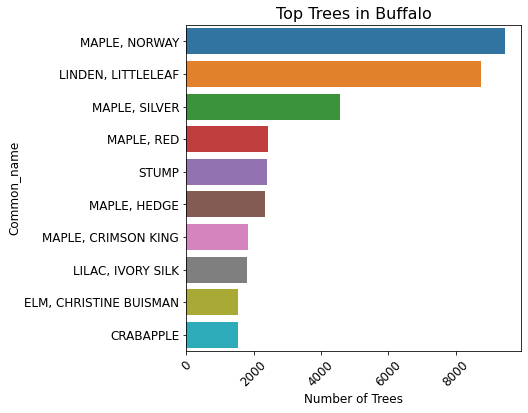

In [ ]:
# Top Trees in Buffalo

top_tree = pd.read_sql_query("SELECT b.Common_name as Common_name, count(a.Site_id) as No_Trees from Location a LEFT JOIN Name b on a.name_id = b.name_id WHERE Common_name NOT IN ( '0' ,'VACANT') GROUP BY Common_name ORDER BY No_Trees DESC Limit 10",conn)
ax = sns.barplot(x="No_Trees",y="Common_name", data=top_tree)
ax.set_title('Top Trees in Buffalo',fontsize=16)
plt.xlabel("Number of Trees")
plt.xticks(rotation=45)
plt.show()

> Top three trees in Buffalo are Maple(Norway),Linden(Littleleaf),Maple(Silver).

> Many trees in Buffalo area are from the Maple Family, with different sub categories like norway, red, silver, etc.

> Lilac, Elm and Honeylocust are equally numbered

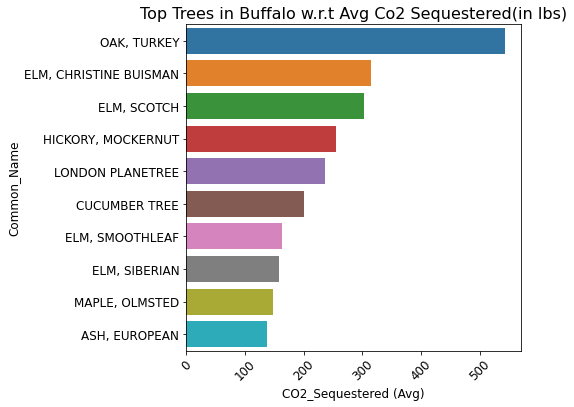

In [ ]:
#Top 10 tress w.r.t avg CO2 Sequestered 

top_co2 = pd.read_sql_query("SELECT b.Common_Name as Common_Name, ROUND(AVG(c.CO2_Sequestered),2) as CO2_Sequestered from Location A left join Name b on a.name_id = b.name_id join Benefits c on a.Site_id = c.Site_id where Common_name NOT IN ( '0' ,'VACANT') GROUP by Common_Name ORDER by CO2_Sequestered DESC LIMIT 10",conn)
ax = sns.barplot(x="CO2_Sequestered",y="Common_Name", data=top_co2)
ax.set_title('Top Trees in Buffalo w.r.t Avg Co2 Sequestered(in lbs)',fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("CO2_Sequestered (Avg)")
plt.show()

> C02 Sequested -> Process of Capturing and storing Atmospheric CO2 

> Oak Turkey dominates in sequesting C02

> Other trees after Oak Turkey don't have significant difference in C02 sequested between each other

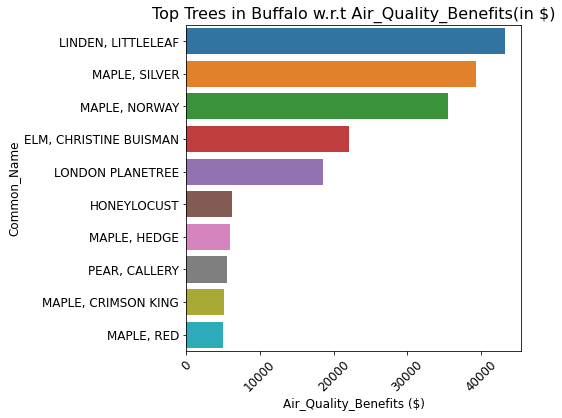

In [ ]:
#Top 10 tress w.r.t Air Quality Benefits

top_air = pd.read_sql_query("SELECT b.Common_Name as Common_Name, ROUND(SUM(c.Air_Quality_Benefits),2) as Air_Quality_Benefits from Location A left join Name b on a.name_id = b.name_id join Benefits c on a.Site_id = c.Site_id where Common_name NOT IN ( '0' ,'VACANT') GROUP by Common_Name ORDER by Air_Quality_Benefits DESC LIMIT 10",conn)
ax = sns.barplot(x="Air_Quality_Benefits",y="Common_Name", data=top_air)
ax.set_title('Top Trees in Buffalo w.r.t Air_Quality_Benefits(in $)',fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Air_Quality_Benefits ($)")
plt.show()

> High Air Quality -> Less Pollution . 

> Air quality benefits is calculated in terms of dollars to calculate net economic gain.

> Liden Littleleaf, Maple( Silver),Maple( Norway) are trees providing max Air quality Benefits

> Honeylocust, Maple( hedge),Pear( callery),Maple( crimson king), Maple( red) are very similar and provide least airquality benefits comparatively 

In [ ]:
#Subsetting Data Where plot has stump or is not vacant 

reg_data = pd.read_sql_query("SELECT A.Total_Yearly_Eco_Benefits, B.Side, CASE WHEN B.Park_Name = '0'  THEN 'No' Else 'Yes' End as is_in_park,  C.Editing, D.Council_District, E.dbh, E.Leaf_Surface_Area from Benefits A left join Tree_Dim E on A.Site_id = E.Site_id left join Location B on A.Site_id = B.Site_id LEFT JOIN District D on B.District_id = D.District_id LEFT JOIN Editing C on  B.Editing_id = C.Editing_id LEFT join Name F on b.name_id =  F.name_id where F.Common_Name not in ('VACANT', '0', 'STUMP')  and B.side != '0'", conn)

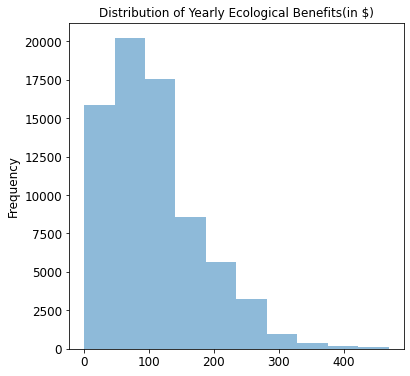

In [ ]:
#yearly benefits
yearly_benefits = reg_data["Total_Yearly_Eco_Benefits"].plot.hist(alpha=0.5)
plt.title("Distribution of Yearly Ecological Benefits(in $)")
plt.show()

> Yearly_ecological_benefits is Right Skewed

> Majority of the trees have ecological benefits between 0 to 150USD in total yearly benefits

> Most number of trees are within the economical yearly benefits of 50 & 100 USD

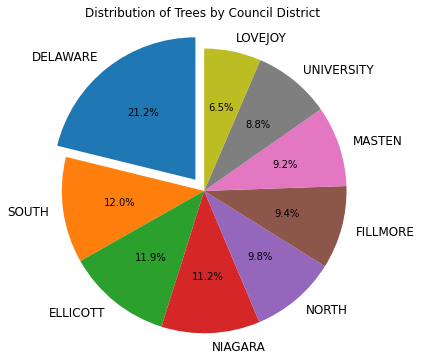

In [ ]:
#Tree Distribution across Council District

dist_count = reg_data['Council_District'].value_counts()
labels = dist_count.index
sizes = dist_count.values
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=(sizes == max(sizes)) * 0.1, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title("Distribution of Trees by Council District")
plt.show()

> Delaware has the most number of trees

> Delware is closely followed up by South , Niagara , North , Fillmore in terms of number of trees

> Lovejoy has the least number of trees in all districts.

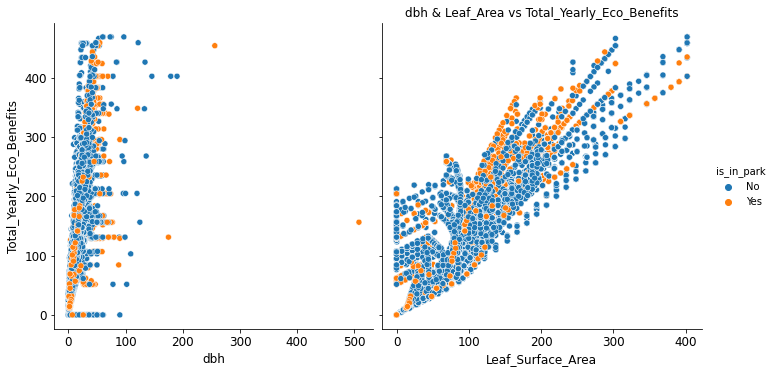

In [ ]:
sns.pairplot(reg_data,x_vars=['dbh','Leaf_Surface_Area'],y_vars=['Total_Yearly_Eco_Benefits'],hue='is_in_park', height = 5)
plt.title("dbh & Leaf_Area vs Total_Yearly_Eco_Benefits")
plt.show()

> Leaf surface area and total yearly benefits indicate strong positive correlation

> Dbh vs Ecological benefits behaves same irrespective of a park or no park

> Leaf Surface Area has higher correlation in presence of park

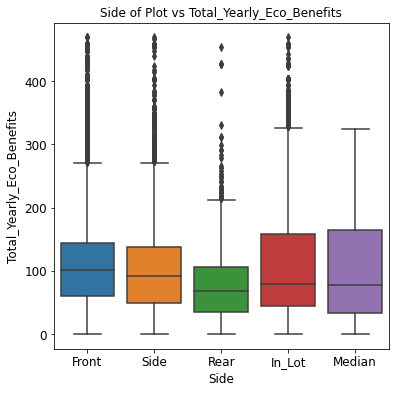

In [ ]:
sns.boxplot(y='Total_Yearly_Eco_Benefits',x='Side',data=reg_data)
plt.title("Side of Plot vs Total_Yearly_Eco_Benefits")
plt.show()

> Front side has highest ecological benefits on an average.

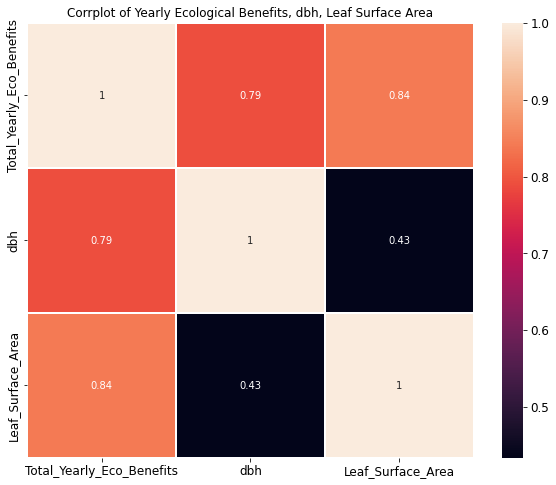

In [ ]:
cont_var = reg_data[['Total_Yearly_Eco_Benefits','dbh', 'Leaf_Surface_Area']]
plt.subplots(figsize=(10,8))
sns.heatmap(cont_var.corr(),annot=True,lw=1)
plt.title("Corrplot of Yearly Ecological Benefits, dbh, Leaf Surface Area")
plt.show()

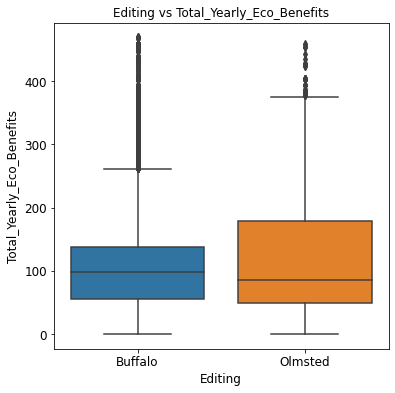

In [ ]:
sns.boxplot(y='Total_Yearly_Eco_Benefits',x='Editing',data=reg_data)
plt.title("Editing vs Total_Yearly_Eco_Benefits")
plt.show()

> On average Trees maintained by city of Buffalo have higher Ecological Benefits

> Ecological benefits of Trees maintained by Buffalo approximately follow normal distribution

> Ecological benefits of Trees maintained by Olmsted is right skewed

# Predictive Modelling - Multiple Linear Regression 

## Do the factors Dimension, Leaf Surface Area, Location attributes of the trees and the organisation that maintains the tree impact Total Yearly Ecological Benefits provided by the tree?

### Dependent Variable Y - Total_Yearly_Eco_Benefits

### Independent Variables Xs: 

> Continuous Variables: dbh, Leaf Surface

> Categorical Variables: 
    - Editing - 2 Categories
    - Council_District - 9 Categories 
    - is_in_park - 2 Categories 
    - Side - 5 Categories 

### Dummy Variables:
> Created to assign numerical value to levels of categorical variables. One level dropped to avoid dummy variable trap

### Train & Test split: 
> The data is split randomly with 80:20 for Train and Test dataset

In [ ]:
# Assigning X,Y | Creating dummies for Categorical Variables

regr_data = reg_data.dropna(axis=0)
X = regr_data[['Side', 'is_in_park', 'Editing','Council_District', 'dbh', 'Leaf_Surface_Area']]
X = pd.get_dummies(data=X, drop_first=True)
Y = regr_data['Total_Yearly_Eco_Benefits']

In [ ]:
display(X.head())

,dbh,Leaf_Surface_Area,Side_In_Lot,Side_Median,Side_Rear,Side_Side,is_in_park_Yes,Editing_Olmsted,Council_District_ELLICOTT,Council_District_FILLMORE,Council_District_LOVEJOY,Council_District_MASTEN,Council_District_NIAGARA,Council_District_NORTH,Council_District_SOUTH,Council_District_UNIVERSITY
0,4.0,30.40,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,4.0,20.75,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,23.0,159.53,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,14.0,84.95,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,23.0,29.23,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Splitting into Train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print("Train Dim")
print(X_train.shape)
print(y_train.shape)

print("Test Dim")
print(X_test.shape)
print(y_test.shape)

Train Dim
(58095, 16)
(58095,)
Test Dim
(14524, 16)
(14524,)


# Predictive Modelling - Results

## Intercept and Coefficients

In [ ]:
# Fitting MLR Model 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import statsmodels.api as sm
from scipy import stats
model = LinearRegression()
lm = model.fit(X_train,y_train)

print("Intercept")
print(lm.intercept_)

coeff_parameter = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print('Coefficients')
print(coeff_parameter)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept
-4.532214207012274
Coefficients
                             Coefficient
dbh                             3.660   
Leaf_Surface_Area               0.815   
Side_In_Lot                   -12.035   
Side_Median                    -0.984   
Side_Rear                      -4.016   
Side_Side                      -1.974   
is_in_park_Yes                 13.189   
Editing_Olmsted                -6.798   
Council_District_ELLICOTT       1.651   
Council_District_FILLMORE       0.814   
Council_District_LOVEJOY       -0.009   
Council_District_MASTEN        -0.902   
Council_District_NIAGARA       -1.382   
Council_District_NORTH         -0.002   
Council_District_SOUTH          0.296   
Council_District_UNIVERSITY     0.123   


## R squared value

In [ ]:
# RMSE and R-Squared 

from sklearn.metrics import mean_squared_error
#Train 
train_predictions = model.predict(X_train)
SS_Residual_train = sum((y_train-train_predictions)**2)
SS_Total_train = sum((y_train-np.mean(y_train))**2)
r_squared_train = round(1 - (float(SS_Residual_train))/SS_Total_train,2)
rmse_train = round(mean_squared_error(y_train, train_predictions),2)

#Test
predictions = model.predict(X_test)
SS_Residual = sum((y_test-predictions)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared_test = round(1 - (float(SS_Residual))/SS_Total,2)

rmse_test = round(mean_squared_error(y_test, predictions),2)
R_squared = [r_squared_train,r_squared_test]
RMSE = [rmse_train,rmse_test]
Title = ['Train','Test']
mod_acc= pd.DataFrame({'Title':Title,'R_Squared':R_squared,'RMSE':RMSE})
display(mod_acc)


,Title,R_Squared,RMSE
0,Train,0.93,385.14
1,Test,0.95,271.91


> The train and test accuracies are measured in terms of R2 score.

> R2 Score measures the variance that can be explained by the model for the target variable

> As per train and test accuracy there is no overfitting reported in our modelling

> The fitted model is generalizable for new Dataset 

## Original Vs Predicted - Scatter plot

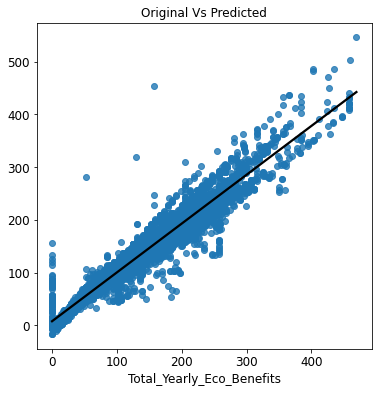

In [ ]:
# Predicting Test Datase

sns.regplot(x = y_test,y = predictions,line_kws={"color": "black"})
plt.title("Original Vs Predicted")
plt.show()

> The model is a  good fit for the data

> Good amount of variation is captured according to R2 Score

# Conclusion

> Dimensions, Location Attributes and Organisation that maintains the tree does have strong impact on Yearly Ecological Benefits 

> Dbh & is_in_park_yes have positive impact on Yearly Ecological Benefits by 13 and 3.6 units

> Editing_Olmsted, Side_In_lot & Side_In_Rear have negative impact on Yearly Ecological Benefits by 6, 12 and 4 units

# Insights 

- From EDA, we see that Liden Littleleaf, Maple(Silver), Maple(Norway) are trees providing maximum Air quality Benefits. 

- Regression analysis shows us that trees planted on the lot has a negative impact on yearly ecological benefits. Therefore, in future, planting trees by the median or side should be preferred 

- Tress maintained Olmsted has a negative yearly ecological benefits. Further investigation is required to understand the causes